In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import numpy as np
import pickle
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hernanadasme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hernanadasme/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

**Loading the csv**

In [15]:
df_freq_1942_1982 = pd.read_csv(r'/Users/hernanadasme/Projects/estadio_1940_1980/csv/df_freq_1942_1982.csv', sep=',', index_col = 0)
df_rt_1942_1949 = pd.read_csv('/Users/hernanadasme/Projects/estadio_1940_1980/csv/df_rt_1942_1949.csv', sep = ',', index_col = 0)

In [8]:
df_freq_1942_1982

,fighter,training,centerforward,chance,sprinter,ring,lineman,line,pitchers,forward,tackle,shot,kick,out,single,crack,referee,sport,boxing,player,standard,knockout,score,team,teams,elgoal,jersey,coach,handicap,catch,dribbling,record,shoot,back,insider,winger,players,field,shortstop,second,ranking,match,club,games,centroforward,foul
counts_english_15_27_1942,0,3,0,16,10,72,0,38,0,22,0,14,0,16,17,129,2,40,7,15,10,1,63,369,60,2,2,10,2,3,2,176,1,38,17,3,6,41,0,15,5,211,324,3,0,5
counts_english_43_59_1943,11,1,0,39,23,129,3,46,1,36,1,34,3,23,25,392,28,78,0,77,9,5,95,247,24,2,1,8,3,2,3,254,1,38,36,15,41,43,1,13,20,341,387,5,0,21
counts_english_76_86_1944,1,3,0,30,14,103,0,41,0,39,6,13,2,13,17,161,18,61,1,31,8,1,35,186,17,0,0,8,20,0,4,149,0,35,25,7,17,12,0,11,8,194,167,2,0,18
counts_english_120_137_1945,7,3,0,53,16,237,1,68,0,75,0,17,2,53,24,221,63,114,0,87,18,16,135,410,38,2,2,37,17,3,18,356,4,50,71,18,40,40,0,7,8,500,402,5,0,62
counts_english_173_189_1946,0,3,0,35,5,181,0,72,0,81,0,23,0,25,37,104,52,66,2,50,18,7,115,462,44,0,13,12,16,1,10,289,0,28,74,43,27,33,0,9,8,417,340,1,0,35
counts_english_225_241_1947,0,2,0,15,12,152,0,56,0,75,0,22,4,21,31,122,115,61,0,35,25,1,151,428,25,0,16,14,19,7,12,326,0,27,71,20,16,91,0,5,11,332,292,6,0,52
counts_english_277_293_1948,4,3,0,20,7,157,0,62,1,39,0,14,0,26,27,105,129,38,0,26,15,5,102,451,36,0,7,12,6,1,10,229,3,36,78,10,20,48,0,10,12,304,261,6,0,43
counts_english_329_346_1949,0,1,0,22,0,137,0,55,0,63,0,6,0,34,24,132,89,50,0,9,20,7,89,445,24,0,1,9,12,14,7,226,0,95,68,14,5,25,0,6,8,255,306,1,0,23
counts_english_381_398_1950,2,1,0,24,8,151,0,47,0,46,0,8,0,27,49,92,9,54,1,6,14,7,62,396,13,0,16,19,21,0,11,132,0,13,33,2,1,9,0,5,24,152,209,4,0,17
counts_english_433_450_1951,12,0,0,18,0,111,0,27,0,92,1,12,2,17,41,109,7,68,0,14,11,6,75,277,15,1,15,12,3,0,15,154,3,51,82,27,4,26,0,8,7,181,253,4,0,30


In [10]:
rt_1942_1949

,fighter,training,centerforward,chance,sprinter,ring,lineman,line,pitchers,forward,tackle,shot,kick,out,single,crack,referee,sport,boxing,player,standard,knockout,score,team,teams,elgoal,jersey,coach,handicap,catch,dribbling,record,shoot,back,insider,winger,players,field,shortstop,second,ranking,match,club,games,centroforward,foul
rt_15_27_1942,0.000000,0.052632,0,0.727273,0.000000,24.000000,0.0,0.358491,0.000000,0.271605,0,0.000000,0.000000,0.231884,0.425000,8.062500,0.027778,0.101781,0.318182,0.034722,3.333333,0.000000,4.846154,0.805677,0,0.006667,0.051282,0.131579,0.222222,0.000000,0.000000,29.333333,0.000000,0.330435,0.320755,0.600000,0,0.152985,0.000000,0.937500,0.333333,0.578082,5.684211,0.111111,0,5.000
rt_43_59_1943,0.134146,0.012658,0,2.437500,1.769231,16.125000,3.0,0.234694,0.076923,0.220859,0,11.333333,0.030612,0.127072,0.454545,23.058824,0.247788,0.149712,0.000000,0.119195,4.500000,1.666667,3.653846,0.267027,0,0.002933,0.026316,0.078431,0.272727,0.400000,0.375000,84.666667,0.500000,0.125000,0.493151,1.875000,0,0.089583,0.017857,0.764706,0.869565,0.677932,5.776119,0.151515,0,7.000
rt_76_86_1944,0.026316,0.069767,0,0.857143,1.076923,103.000000,0.0,0.405941,0.000000,0.513158,0,13.000000,0.033898,0.131313,0.447368,6.192308,0.191489,0.248980,0.025000,0.077307,8.000000,0.000000,1.458333,0.350943,0,0.000000,0.000000,0.068376,1.538462,0.000000,2.000000,16.555556,0.000000,0.205882,1.086957,1.166667,0,0.042553,0.000000,1.571429,0.727273,0.726592,6.680000,0.074074,0,4.500
rt_120_137_1945,0.063636,0.039474,0,1.709677,0.571429,18.230769,0.5,0.435897,0.000000,0.700935,0,1.545455,0.013158,0.251185,0.510638,5.972973,0.372781,0.206897,0.000000,0.200924,4.500000,16.000000,5.625000,0.581560,0,0.002200,0.040000,0.250000,1.062500,1.500000,2.000000,59.333333,0.444444,0.176056,5.916667,1.058824,0,0.084211,0.000000,0.875000,0.347826,1.506024,10.050000,0.092593,0,15.500
rt_173_189_1946,0.000000,0.039474,0,0.972222,0.625000,36.200000,0.0,0.525547,0.000000,0.736364,0,3.285714,0.000000,0.135870,0.770833,2.810811,0.253659,0.179837,0.011696,0.121065,9.000000,0.000000,4.107143,0.793814,0,0.000000,0.200000,0.107143,2.000000,1.000000,1.111111,14.450000,0.000000,0.099291,3.700000,2.866667,0,0.081683,0.000000,1.500000,0.347826,1.399329,21.250000,0.012346,0,7.000
rt_225_241_1947,0.000000,0.031250,0,0.405405,2.000000,76.000000,0.0,0.311111,0.000000,0.474684,0,1.157895,0.027211,0.136364,0.484375,4.066667,1.554054,0.163539,0.000000,0.089514,0.000000,0.000000,3.973684,0.762923,0,0.000000,0.470588,0.127273,1.727273,7.000000,2.000000,20.375000,0.000000,0.090000,2.366667,1.111111,0,0.226368,0.000000,1.666667,0.423077,1.003021,16.222222,0.084507,0,10.400
rt_277_293_1948,0.065574,0.020408,0,0.512821,0.259259,78.500000,0.0,0.659574,0.066667,0.230769,0,0.636364,0.000000,0.128079,0.421875,3.500000,1.372340,0.089412,0.000000,0.068241,15.000000,0.000000,2.318182,0.879142,0,0.000000,0.114754,0.092308,0.352941,0.333333,0.909091,10.409091,0.500000,0.110092,1.857143,0.625000,0,0.139130,0.000000,1.428571,0.218182,0.915663,14.500000,0.081081,0,5.375
rt_329_346_1949,0.000000,0.006803,0,0.564103,0.000000,68.500000,0.0,0.585106,0.000000,0.372781,0,0.272727,0.000000,0.167488,0.375000,4.400000,0.946809,0.117647,0.000000,0.023622,20.000000,0.000000,2.022727,0.867446,0,0.000000,0.016393,0.069231,0.705882,4.666667,0.636364,10.272727,0.000000,0.290520,1.619048,0.875000,0,0.072464,0.000000,0.857143,0.145455,0.768072,17.000000,0.013514,0,2.875


**Visualizations**

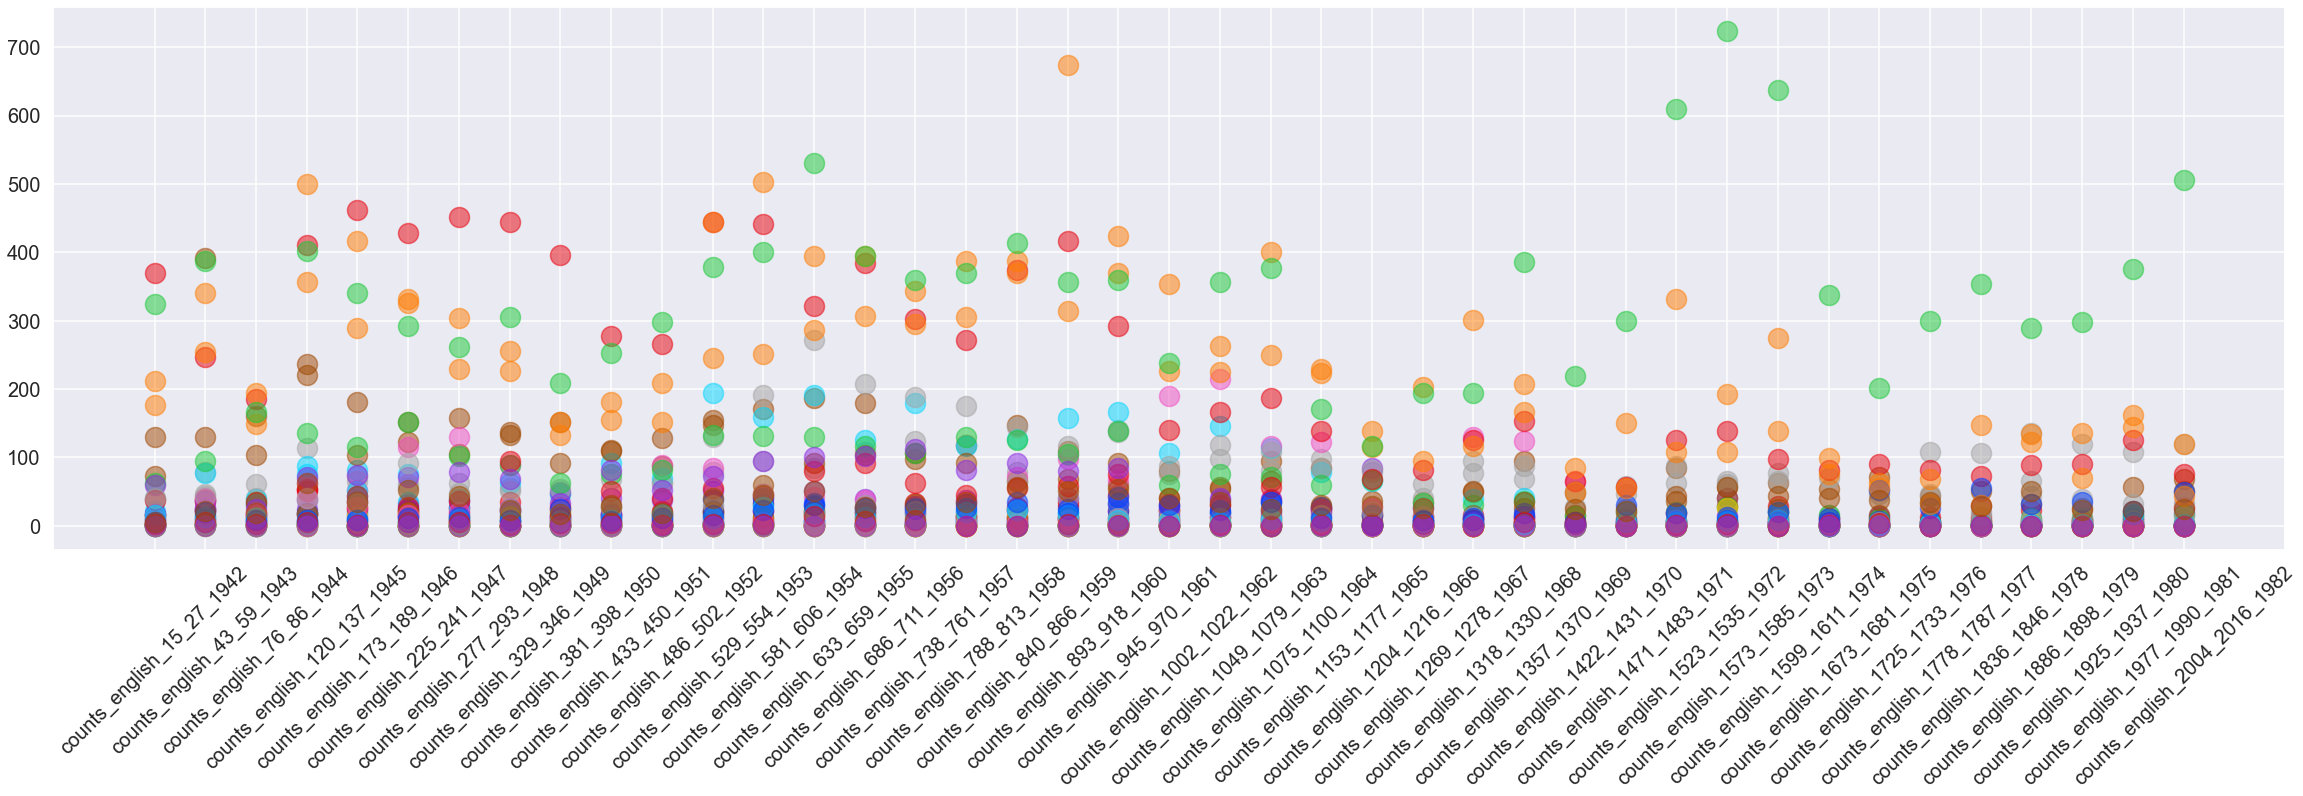

In [13]:
fig, ax = plt.subplots(figsize=(40, 10))
for column in df_freq_1942_1982.columns:
    ax.scatter(df_freq_1942_1982.index, df_freq_1942_1982[column], label=column, s=400, alpha = 0.5)

sns.set_style('darkgrid')
sns.set_palette('bright')
sns.set_context('talk')

#ax.legend()
#ax.set_xlabel('Document')
#ax.set_ylabel('Frequency')
ax.set_xticks(df_freq_1942_1982.index)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20)
#plt.legend(fontsize='20')
plt.show()

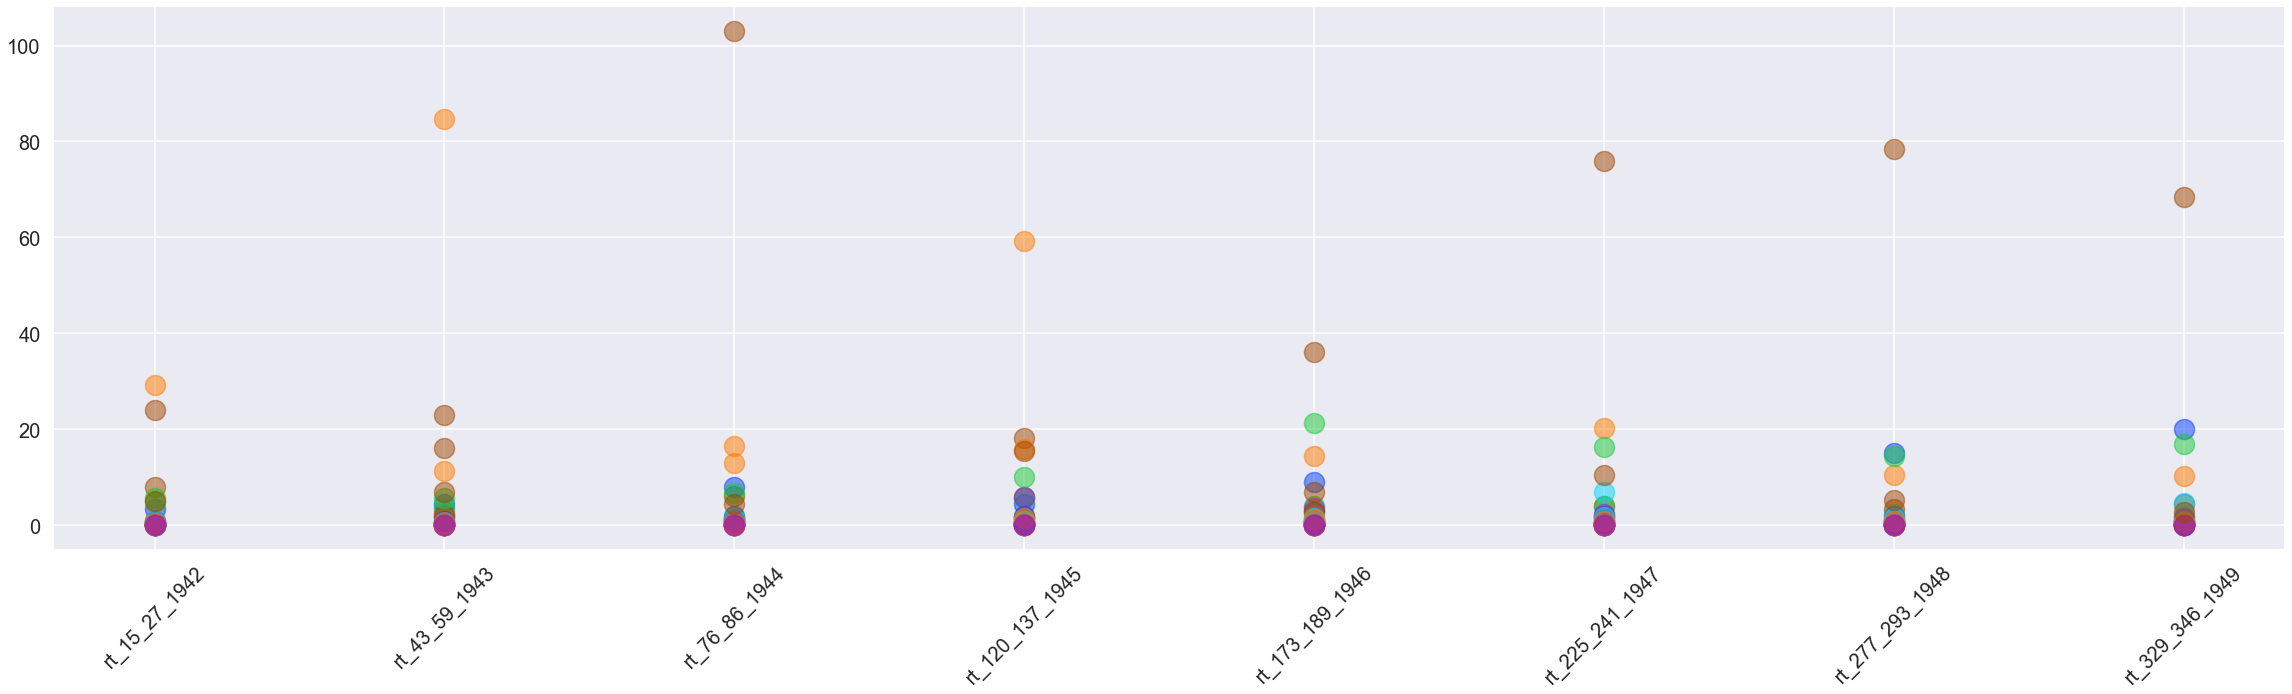

In [16]:
# create a scatter plot with points instead of bars
fig, ax = plt.subplots(figsize=(40, 10))
for column in df_rt_1942_1949.columns:
    ax.scatter(df_rt_1942_1949.index, df_rt_1942_1949[column], label=column, s=400, alpha = 0.5)

sns.set_style('darkgrid')
sns.set_palette('bright')
sns.set_context('talk')

#ax.legend()
#ax.set_xlabel('Document)
#ax.set_ylabel('Frequency')
ax.set_xticks(df_rt_1942_1949.index)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20)
#plt.legend(fontsize='20')
plt.show()